<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/jarvis-tools-notebooks/JARVIS_TE_Data_driven_discovery_of_3D_and_2D_thermoelectric_materials.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reference:**
[Data-driven discovery of 3D and 2D thermoelectric materials](https://iopscience.iop.org/article/10.1088/1361-648X/aba06b/meta)

In [1]:
!pip install jarvis-tools

     |████████████████████████████████| 962 kB 5.2 MB/s 
     |████████████████████████████████| 325 kB 23.7 MB/s 


In [2]:
!wget https://raw.githubusercontent.com/knc6/jarvis-tools-notebooks/master/jarvis-tools-notebooks/additional_data/Seeb-Exp.csv

--2022-05-23 00:24:37--  https://raw.githubusercontent.com/knc6/jarvis-tools-notebooks/master/jarvis-tools-notebooks/additional_data/Seeb-Exp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2933 (2.9K) [text/plain]
Saving to: ‘Seeb-Exp.csv’

Seeb-Exp.csv        100%[===================>]   2.86K  --.-KB/s    in 0s      

2022-05-23 00:24:37 (20.1 MB/s) - ‘Seeb-Exp.csv’ saved [2933/2933]



In [4]:
import pandas as pd
df=pd.read_csv('Seeb-Exp.csv')

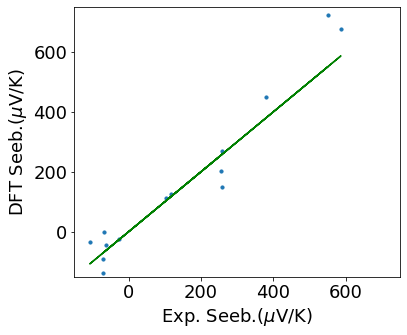

In [24]:
# Experimental comparison
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(6,5))
plt.scatter(df['Exp'],df['DFT'],s=10)
plt.plot(df['Exp'],df['Exp'],c='g')
# axes=plt.gca()
# axes.set_aspect('equal')
plt.xlabel('Exp. Seeb.($\\mu$V/K)')
plt.ylabel('DFT Seeb.($\\mu$V/K)')
plt.xlim([-150,750])
plt.ylim([-150,750])
plt.tight_layout()

In [25]:
from jarvis.db.figshare import data
dft_3d=pd.DataFrame(data('dft_3d'))

Obtaining 3D dataset 55k ...
Reference:https://www.nature.com/articles/s41524-020-00440-1


100%|██████████| 31.9M/31.9M [00:48<00:00, 653kiB/s] 


Loading the zipfile...
Loading completed.


In [26]:
dft_3d.columns

Index(['jid', 'spg_number', 'spg_symbol', 'formula',
       'formation_energy_peratom', 'func', 'optb88vdw_bandgap', 'atoms',
       'slme', 'magmom_oszicar', 'spillage', 'elastic_tensor',
       'effective_masses_300K', 'kpoint_length_unit', 'maxdiff_mesh',
       'maxdiff_bz', 'encut', 'optb88vdw_total_energy', 'epsx', 'epsy', 'epsz',
       'mepsx', 'mepsy', 'mepsz', 'modes', 'magmom_outcar', 'max_efg',
       'avg_elec_mass', 'avg_hole_mass', 'icsd', 'dfpt_piezo_max_eij',
       'dfpt_piezo_max_dij', 'dfpt_piezo_max_dielectric',
       'dfpt_piezo_max_dielectric_electronic',
       'dfpt_piezo_max_dielectric_ionic', 'max_ir_mode', 'min_ir_mode',
       'n-Seebeck', 'p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond',
       'pcond', 'nkappa', 'pkappa', 'ehull', 'dimensionality', 'efg',
       'xml_data_link', 'typ', 'exfoliation_energy', 'spg', 'crys', 'density',
       'poisson', 'raw_files', 'nat', 'bulk_modulus_kv', 'shear_modulus_gv',
       'mbj_bandgap', 'hse_gap', 'reference'

In [30]:
import numpy as np

dft_te=dft_3d[['jid','optb88vdw_bandgap','n-Seebeck','p-Seebeck', 'n-powerfact', 'p-powerfact', 'ncond','pcond', 'nkappa', 'pkappa','dimensionality','spg_number']].replace('na',np.nan).dropna()

In [51]:
nseeb=df_te['n-Seebeck']
pseeb=df_te['p-Seebeck']
npowf=dft_te['n-powerfact']
ppowf=dft_te['p-powerfact']
ncond=dft_te['ncond']
pcond=dft_te['pcond']
spgs=dft_te['spg_number']
gaps=dft_te['optb88vdw_bandgap']
dims=dft_te['dimensionality']
jids=dft_te['jid']

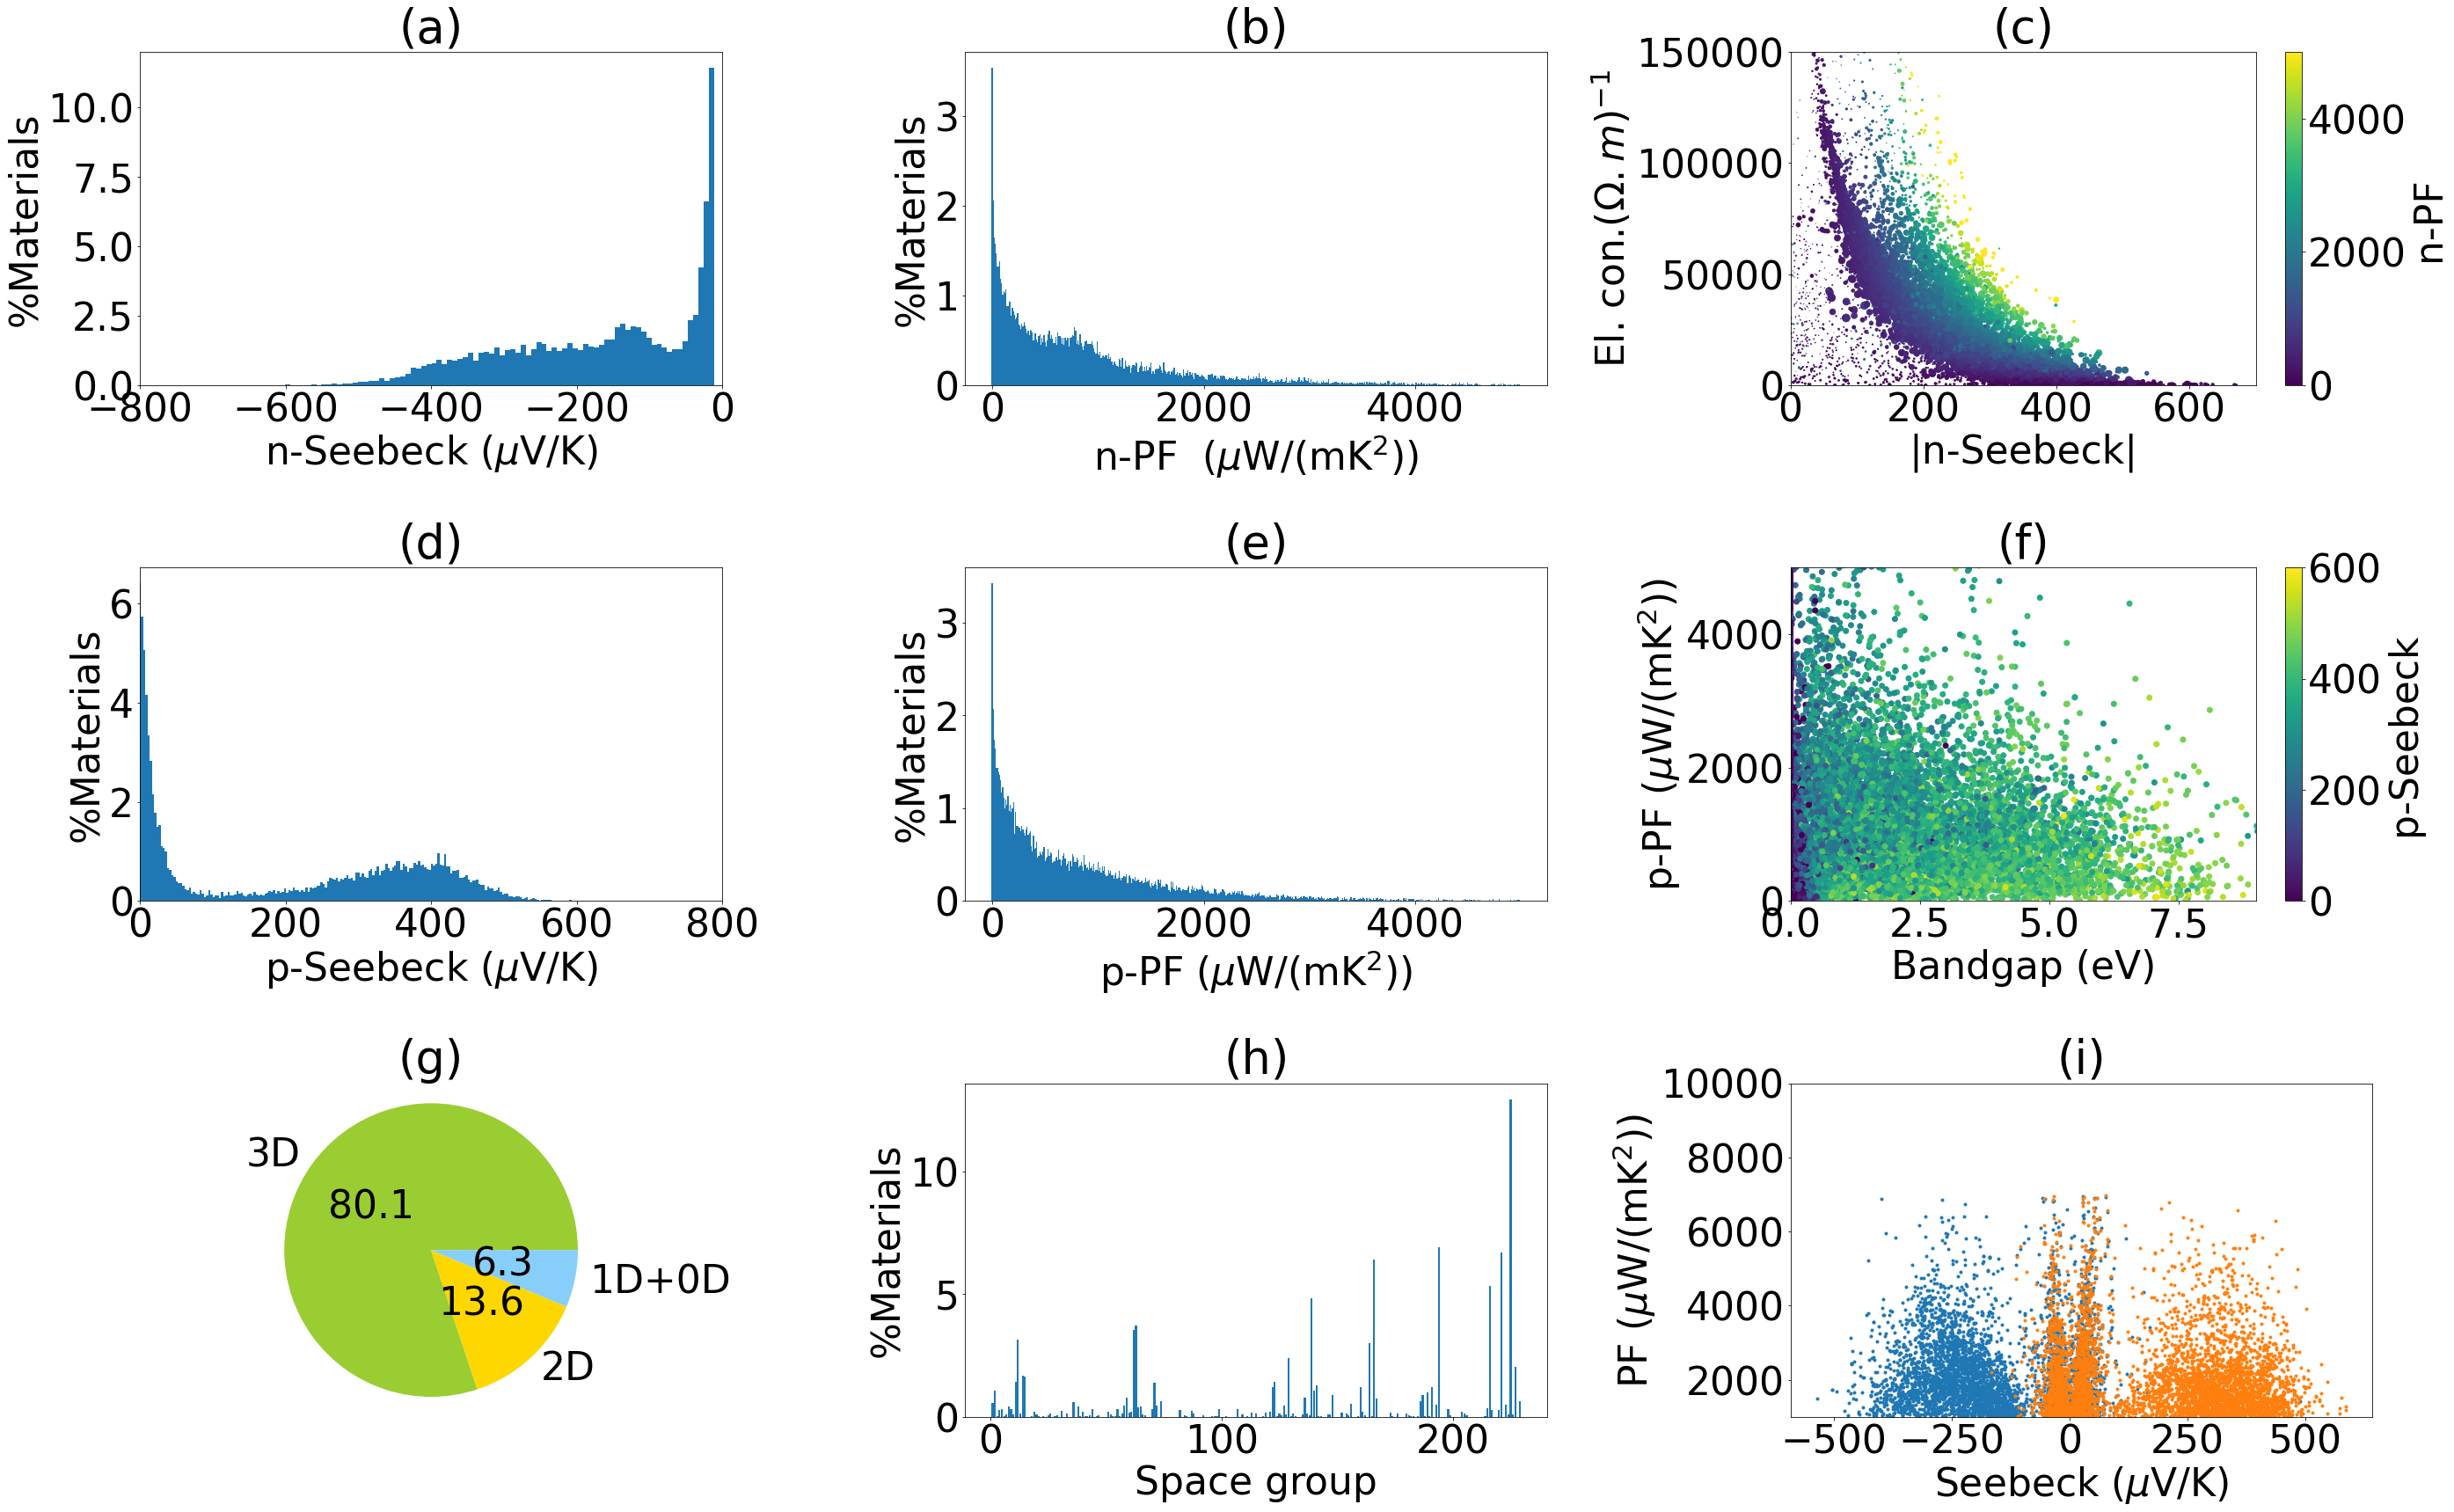

In [54]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
from matplotlib.gridspec import GridSpec
def arr2pctarr(arr=[]):
    summ=np.sum(np.array(arr))
    new_arr=[100*float(i)/float(summ) for i in arr]
    return new_arr

# nseeb=[]
# pseeb=[]
# nzt=[]
# pzt=[]
# npowf=[]
# ppowf=[]
# ncond=[]
# pcond=[]

# spg_numb=[]
crys=[]
scfgap=[]

# dim=[]
comp=[]



the_grid = GridSpec(3, 3)
plt.rcParams.update({'font.size': 44})
plt.figure(figsize=(40,25))



cutoff=min(nseeb)

intvl=abs(cutoff/200.0)
hist_3d, bins_3d = np.histogram(nseeb,bins=np.arange( cutoff + intvl,0, intvl), density=False)
plt.subplot(the_grid[0, 0])

y_tmp=arr2pctarr(hist_3d)
plt.bar(bins_3d[:-1],y_tmp,width=intvl)
plt.xlabel('n-Seebeck ($\\mu$V/K)')
plt.ylabel('%Materials')
plt.title('(a)')
plt.xlim([-800,0])
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)






cutoff=max(npowf)

cutoff=5000.0
intvl=10.0
hist_3d, bins_3d = np.histogram(npowf,bins=np.arange( 0,cutoff + intvl, intvl), density=False)
plt.subplot(the_grid[0, 1])

y_tmp=arr2pctarr(hist_3d)
plt.bar(bins_3d[:-1],y_tmp,width=10)
plt.xlabel('n-PF  ($\\mu$W/(mK$^2$))')
plt.ylabel('%Materials')
plt.title('(b)')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)




plt.subplot(the_grid[0, 2])
plt.xlabel('|n-Seebeck|')
plt.ylabel('El. con.$({\Omega.m})^{-1}$')
plt.title('(c)')
plt.scatter(np.abs(np.array(nseeb)),ncond,s=10*(np.array(gaps)),c=((np.array(npowf))),vmin=0,vmax=5000)
cbar=plt.colorbar()
cbar.set_label('n-PF', rotation=90)
plt.xlim([0,700])
plt.ylim([0,150000])
# plt.xlabel('Bandgap (eV)')
# plt.ylabel('n-PF ($\\mu$W/(mK$^2$))')
# plt.title('(c)')
# plt.scatter(gaps,npowf,c=np.abs(np.array(nseeb)),vmin=0,vmax=600)
# cbar=plt.colorbar()
# cbar.set_label('|n-Seebeck|', rotation=90)
# plt.xlim([0,9])
# plt.ylim([0,5000])





cutoff=max(pseeb)

intvl=cutoff/200.0
hist_3d, bins_3d = np.histogram(pseeb,bins=np.arange( 0,cutoff + intvl, intvl), density=False)
plt.subplot(the_grid[1, 0])
y_tmp=arr2pctarr(hist_3d)
plt.bar(bins_3d[:-1],y_tmp,width=intvl)
plt.xlabel('p-Seebeck ($\\mu$V/K)')
plt.ylabel('%Materials')
plt.title('(d)')
plt.xlim([0,800])
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)



cutoff=max(ppowf)

cutoff=5000.0
intvl=10.0
hist_3d, bins_3d = np.histogram(ppowf,bins=np.arange( 0,cutoff + intvl, intvl), density=False)
plt.subplot(the_grid[1, 1])
y_tmp=arr2pctarr(hist_3d)
plt.bar(bins_3d[:-1],y_tmp,width=10)
plt.xlabel('p-PF ($\\mu$W/(mK$^2$))')
plt.ylabel('%Materials')
plt.title('(e)')
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)





plt.subplot(the_grid[1, 2])

plt.xlabel('Bandgap (eV)')
plt.ylabel('p-PF ($\\mu$W/(mK$^2$))')
plt.title('(f)')
plt.scatter(gaps,ppowf,c=pseeb,vmin=0,vmax=600)
cbar=plt.colorbar()
cbar.set_label('p-Seebeck', rotation=90)
plt.xlim([0,9])
plt.ylim([0,5000])



nseeb_good=[]
pseeb_good=[]
spg_numb_good=[]
crys_good=[]
dim_good=[]
npf_good=[]
ppf_good=[]



for i,j,k,l,m,n,o in zip(nseeb.values,pseeb.values,npowf.values,ppowf.values,dims.values,spgs.values,jids.values):
 if i!='na' and j!='na' and k!='na' :
   if l>1000 and k>1000:
     nseeb_good.append(i)
     pseeb_good.append(j)
     spg_numb_good.append(int(n))
     dim_good.append(m)      
     npf_good.append(k)
     ppf_good.append(l)

all3d=[]
all2d=[]
all1d=[]
all0d=[]
for i in dim_good:
     if i=='3D-bulk':
        all3d.append(i)
     if i=='2D-bulk':
        all2d.append(i)
     if i=='1D-bulk':
        all1d.append(i)
     if i=='0D-bulk':
        all0d.append(i)

plt.subplot(the_grid[2, 0],aspect=1)
labels=['3D','2D','1D'+'+0D']
plt.title('(g)')
colors=['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','lightblue','lightgreen','olive','tomato']
plt.pie(arr2pctarr([len(all3d),len(all2d),len(all1d)+len(all0d)]),labels=labels,radius=1.1,pctdistance=0.5, colors=colors,autopct='%.1f')



plt.subplot(the_grid[2, 1])
spg_dat=Counter(spg_numb_good)
#print (spg_dat)
plt.title('(h)')
plt.xlabel('Space group')
dspg=[i for i in spg_dat.values()]
y_tmp=arr2pctarr(dspg)
plt.bar(spg_dat.keys(),y_tmp)
plt.ylabel('%Materials')
plt.locator_params(axis='x', nbins=5)
#plt.setp( ax.xaxis.get_majorticklabels(), rotation=30 )




plt.subplot(the_grid[2, 2])
plt.title('(i)')
plt.ylim([1000,10000])
plt.xlabel('Seebeck ($\\mu$V/K)')
plt.ylabel('PF ($\\mu$W/(mK$^2$))')
plt.plot(nseeb_good,npf_good,'.')
plt.plot(pseeb_good,ppf_good,'.')
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='x', nbins=5)

plt.subplots_adjust(hspace=0.5,wspace = 0.4)
plt.tight_layout()


In [55]:
pip freeze

absl-py==1.0.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.2.0
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arviz==0.12.1
astor==0.8.1
astropy==4.3.1
astunparse==1.6.3
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.4.0
audioread==2.1.9
autograd==1.4
Babel==2.10.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==5.0.0
blis==0.4.1
bokeh==2.3.3
Bottleneck==1.3.4
branca==0.5.0
bs4==0.0.1
CacheControl==0.12.11
cached-property==1.5.2
cachetools==4.2.4
catalogue==1.0.0
certifi==2021.10.8
cffi==1.15.0
cftime==1.6.0
chardet==3.0.4
charset-normalizer==2.0.12
click==7.1.2
cloudpickle==1.3.0
cmake==3.22.4
cmdstanpy==0.9.5
colorcet==3.0.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.4.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.7
cvxpy==1.0.31
cycler==0.11.0
cymem==2.0.6
Cython==0.29.30
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed=